In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
 #ml library
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


##### visualize relation between data using plotly

In [5]:
fig=px.scatter(df['YearsExperience'],df['Salary'])
fig.show()

In [6]:
#assign x,y
z=df['YearsExperience']
p=df['Salary']
a=np.array(z)
x=a.reshape(-1, 1)
b=np.array(p)
y=b.reshape(-1, 1)

In [7]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [8]:
#Build_model
model = LinearRegression()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
y_predict

array([[ 63507.83397809],
       [100883.41026576],
       [ 60632.78964827],
       [ 72132.96696755],
       [ 37632.43500971],
       [ 35715.73878983]])

In [9]:
y_test

array([[ 55794.],
       [101302.],
       [ 57189.],
       [ 67938.],
       [ 46205.],
       [ 39343.]])

#### Visualize

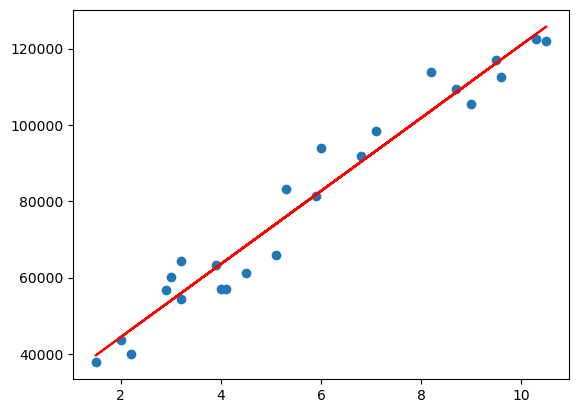

In [10]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

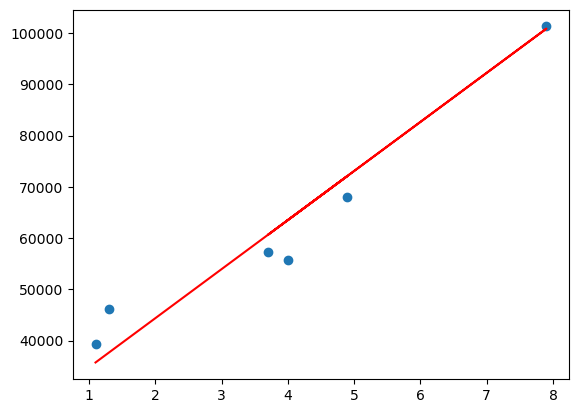

In [11]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='red')

In [12]:
df2=pd.DataFrame({'actual':y_test.flatten(),'prediction':y_predict.flatten()})
df2

,actual,prediction
0,55794.0,63507.833978
1,101302.0,100883.410266
2,57189.0,60632.789648
3,67938.0,72132.966968
4,46205.0,37632.435010
5,39343.0,35715.738790


<AxesSubplot:>

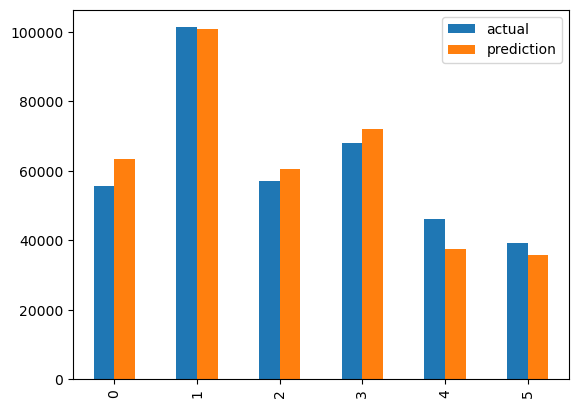

In [13]:
df2.plot(kind='bar')

________________________

In [14]:
import statsmodels.api as sm # strong libraryin statics

In [15]:
x_stat=sm.add_constant(x_train) #for add inputs
model2=sm.OLS(y_train,x_stat).fit()

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     487.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.66e-16
Time:                        19:56:24   Log-Likelihood:                -241.41
No. Observations:                  24   AIC:                             486.8
Df Residuals:                      22   BIC:                             489.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.517e+04   2746.171      9.167      0.000    1.95e+04    3.09e+04
x1          9583.4811    433.871     22.088      0.000    8683.687    1.05e+04
==============================================================================
Omnibus:                        1.830   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.377
Skew:                           0.386   Prob(JB):                        0.502
Kurtosis:                       2.116   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""